## Problem Statement
Banks run marketing campaigns to promote term deposit subscriptions.
However, not all customers respond positively, which leads to wasted resources.

## Objective
To build a classification model that predicts whether a customer will subscribe
to a term deposit based on personal, financial, and campaign-related attributes.


## Dataset Description
The dataset contains customer demographic details, financial status,
and previous marketing campaign outcomes.

Target Variable:
- y: Whether the customer subscribed to a term deposit (yes/no)


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("bank-full.csv", sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,durations,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'durations', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Data Cleaning and Preprocessing
- Check for missing values
- Encode categorical variables
- Convert target variable into binary format


In [3]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
durations    0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = [
    'job','marital','education','default','housing',
    'loan','contact','month','poutcome','y'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,durations,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


## Exploratory Data Analysis
Analyzing customer response distribution.


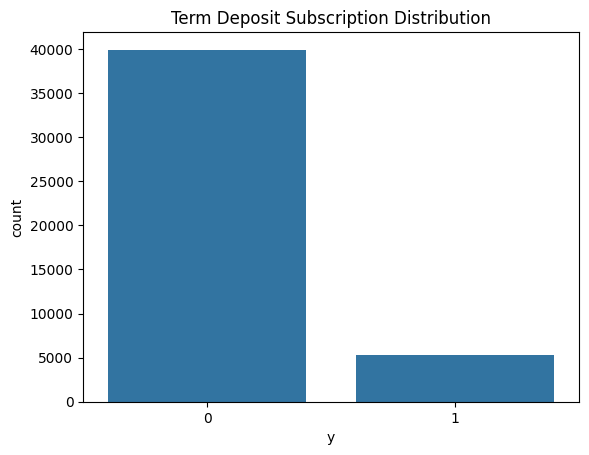

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='y', data=df)
plt.title("Term Deposit Subscription Distribution")
plt.show()


## Model Building
Training Logistic Regression and Random Forest models.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Model Evaluation
Evaluating models using Confusion Matrix, F1-score, and ROC Curve.


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7949
           1       0.57      0.20      0.30      1093

    accuracy                           0.89      9042
   macro avg       0.73      0.59      0.62      9042
weighted avg       0.86      0.89      0.86      9042



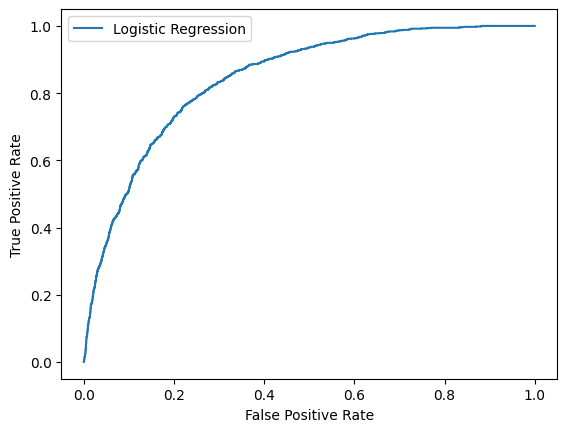

In [13]:
y_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


## Model Explainability using SHAP
Explaining individual customer predictions.


In [15]:
!pip install shap

   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.3 kB ? eta -:--:--
   ---------------------------------------- 549.3/549.3 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 2.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.8/2.8 MB 1.2 MB/s eta 0:00:02
   --------------- ------------------------ 1.0/2.8 MB 1.4 MB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.8 MB 1.5 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.8 MB 1.5 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.8 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 1.6 MB/s eta 0:00:00
   --------------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


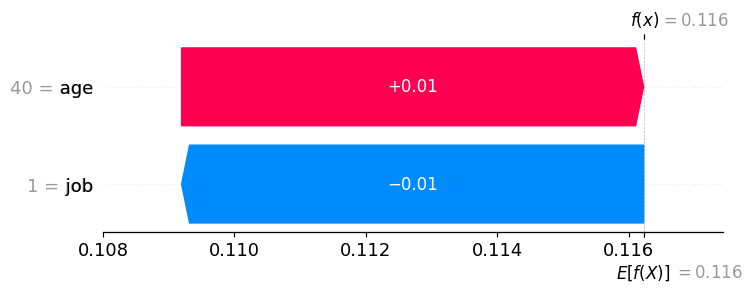

In [17]:
# Use TreeExplainer explicitly for Random Forest
explainer = shap.TreeExplainer(rf)

# SHAP values for test samples
shap_values = explainer.shap_values(X_test)

# Waterfall plot for first prediction (class 1 = YES)
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[1][0],
        base_values=explainer.expected_value[1],
        data=X_test.iloc[0],
        feature_names=X_test.columns
    )
)
